<a href="https://colab.research.google.com/github/pkolakal/IT7103/blob/main/pkolakal_Assignment2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

# Step 1: Load the data into a Pandas DataFrame
df = pd.read_csv('/content/auto-mpg.csv')

# Display the first few rows of the dataset using PrettyTable
print("First few rows of the dataset:")
table = PrettyTable()
table.field_names = df.columns.tolist()
for row in df.head().values:
    table.add_row(row)
print(table, "\n")

# Display the data types of each column using PrettyTable
print("Data types of each column:")
dtype_table = PrettyTable()
dtype_table.field_names = ["Column", "Data Type"]
for col, dtype in df.dtypes.items():
    dtype_table.add_row([col, dtype])
print(dtype_table, "\n")

# Check for any incorrect column types and convert if necessary
# Replace '?' with NaN in 'horsepower' and convert to float
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

First few rows of the dataset:
+------+-----------+--------------+------------+--------+--------------+------------+--------+---------------------------+
| mpg  | cylinders | displacement | horsepower | weight | acceleration | model year | origin |          car name         |
+------+-----------+--------------+------------+--------+--------------+------------+--------+---------------------------+
| 18.0 |     8     |    307.0     |   130.0    |  3504  |     12.0     |     70     |   1    | chevrolet chevelle malibu |
| 15.0 |     8     |    350.0     |   165.0    |  3693  |     11.5     |     70     |   1    |     buick skylark 320     |
| 18.0 |     8     |    318.0     |   150.0    |  3436  |     11.0     |     70     |   1    |     plymouth satellite    |
| 16.0 |     8     |    304.0     |   150.0    |  3433  |     12.0     |     70     |   1    |       amc rebel sst       |
| 17.0 |     8     |    302.0     |   140.0    |  3449  |     10.5     |     70     |   1    |        ford t

In [ ]:
# Step 2: Split the data into 75% training and 25% testing sets
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Print the shapes of the training and testing datasets
print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}\n")

Training set shape: (298, 9)
Testing set shape: (100, 9)



Histograms for numeric columns:


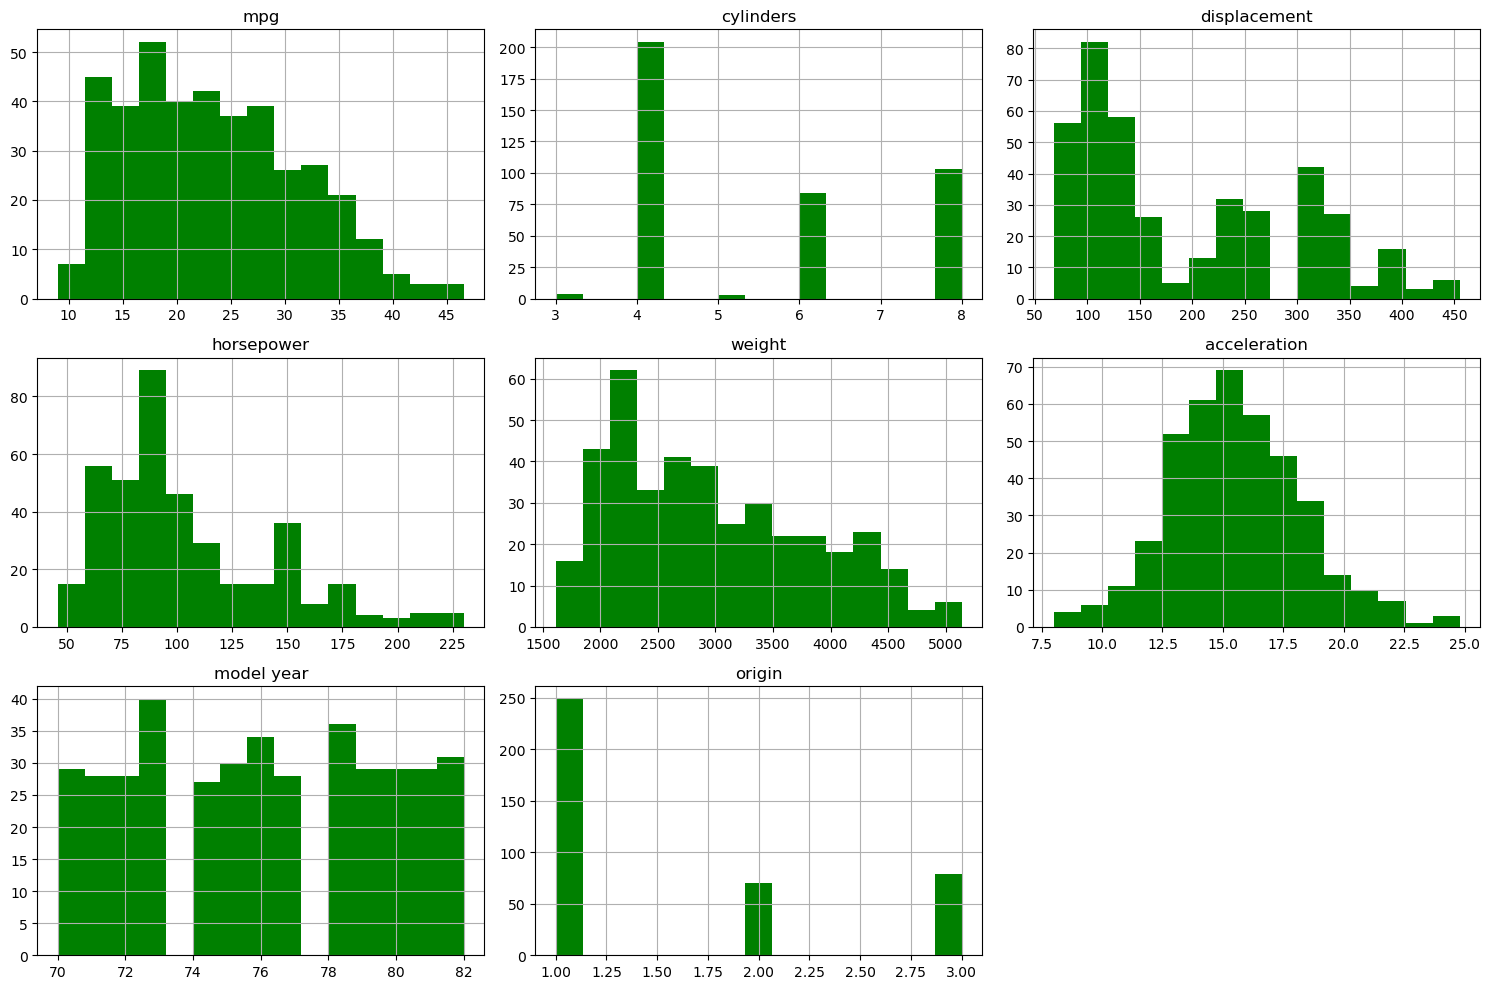

Box plots for numeric columns:


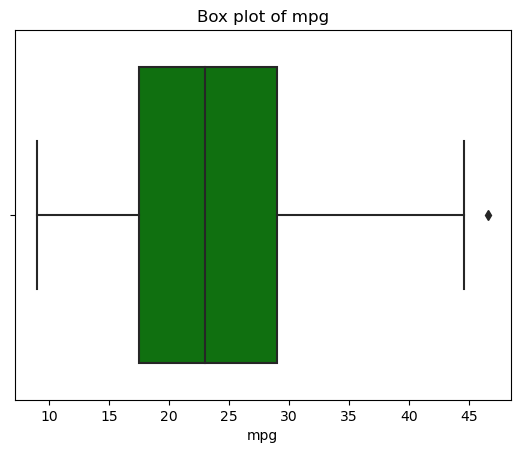

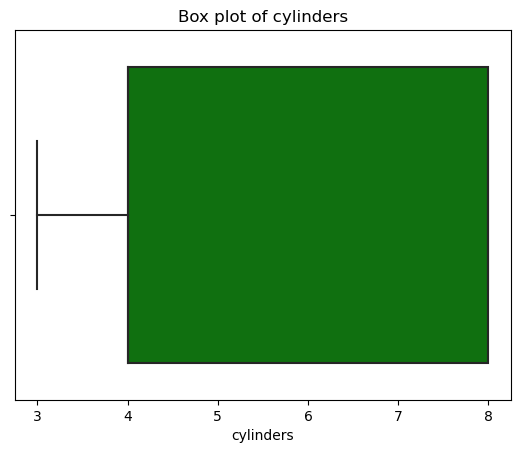

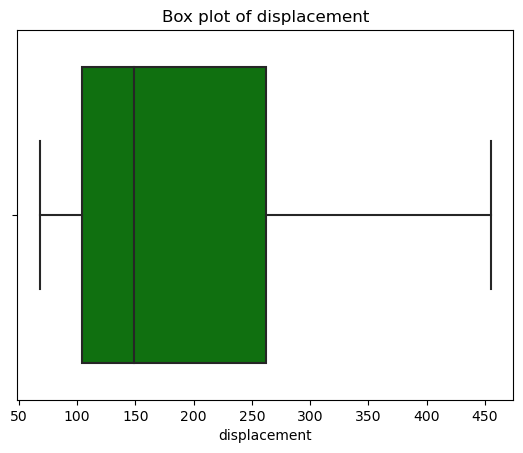

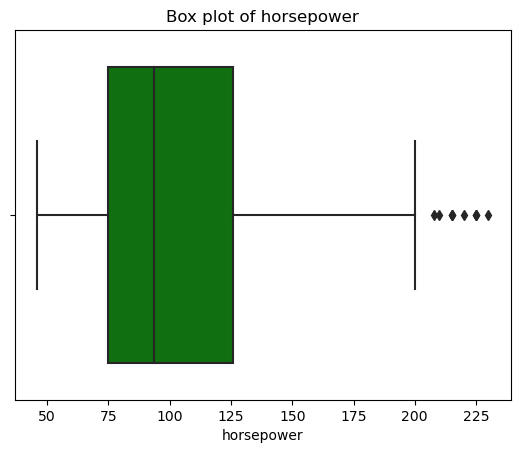

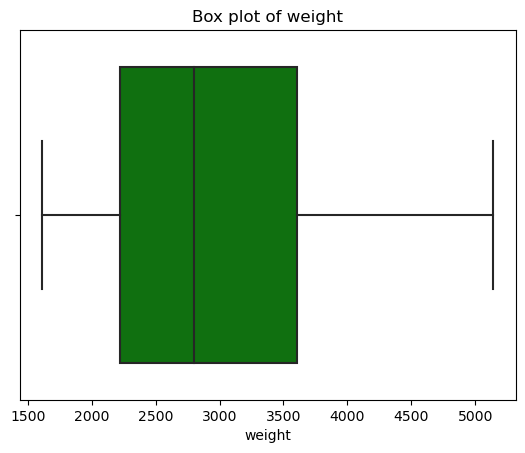

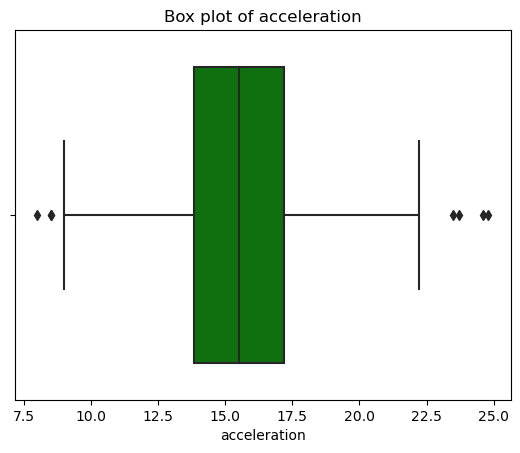

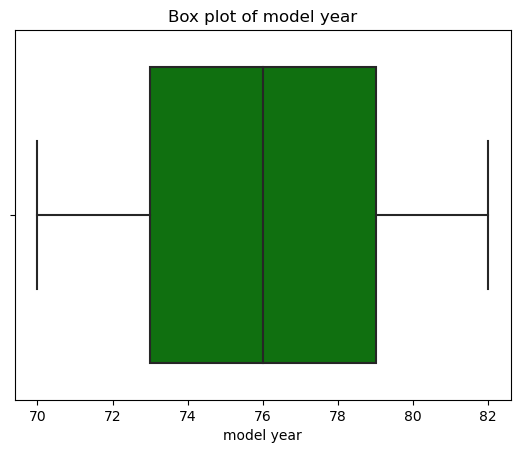

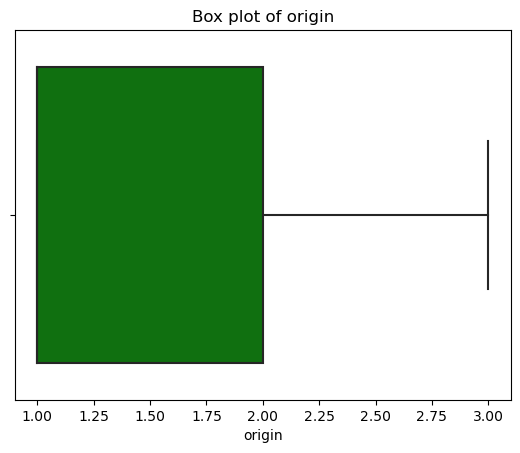

Columns categorized:
Numeric symmetric columns: ['acceleration']
Numeric skewed columns: ['mpg', 'displacement', 'horsepower', 'weight']
Categorical columns: ['origin']



In [ ]:
# Step 3: Visualize necessary columns in the data
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histograms for numeric columns to determine distribution
print("Histograms for numeric columns:")
df[numeric_columns].hist(bins=15, color='green', figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

# Use seaborn to create box plots for numeric columns
print("Box plots for numeric columns:")
for col in numeric_columns:
    plt.figure()
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Box plot of {col}')
    plt.show()

# Based on the visualizations, categorize columns
# Assuming 'acceleration' is symmetric, and others are skewed for this example
numeric_symmetric_cols = ['acceleration']
numeric_skewed_cols = ['mpg', 'displacement', 'horsepower', 'weight']
categorical_cols = ['origin']

print("Columns categorized:")
print(f"Numeric symmetric columns: {numeric_symmetric_cols}")
print(f"Numeric skewed columns: {numeric_skewed_cols}")
print(f"Categorical columns: {categorical_cols}\n")


In [ ]:
# Step 4: Build a pipeline for data preprocessing

# Define the processing steps for numeric and symmetric columns: Imputation -> Standardization
numeric_symmetric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define the processing steps for numeric and skewed columns: Imputation -> Log Transformation -> Standardization
log_transformer = FunctionTransformer(np.log1p, validate=True)
numeric_skewed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log', log_transformer),
    ('scaler', StandardScaler())
])

# Define the processing steps for categorical columns: One hot encoding
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

# Combine the pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('num_sym', numeric_symmetric_pipeline, numeric_symmetric_cols),
    ('num_skew', numeric_skewed_pipeline, numeric_skewed_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

In [ ]:
# Step 5: Train the pipeline on the training data
print("Fitting the preprocessor on the training data...\n")
preprocessor.fit(train_df)

# Perform the transformation on both training and testing data
print("Transforming the training and testing data...\n")
train_processed = preprocessor.transform(train_df)
test_processed = preprocessor.transform(test_df)

Fitting the preprocessor on the training data...

Transforming the training and testing data...



In [ ]:
# Step 6: Print the shape of the processed training and testing data
print(f"Processed training set shape: {train_processed.shape}")
print(f"Processed testing set shape: {test_processed.shape}")

Processed training set shape: (298, 8)
Processed testing set shape: (100, 8)
